In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Sk
from tqdm import tqdm

from WLM import WLChain

import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [2]:
q = (np.logspace(-4,0,65))

L = 10000
b = L/100*2 # Kuhn length

N_backbone = 10000
a_backbone = N_backbone/100
lambda_backbone = L/N_backbone

In [3]:
# Pedersen_1996
S_q = Sk.Sk(q,L,b)

In [4]:
# MC
chain01 = WLChain(N_backbone,a_backbone,lambda_backbone)
chain01.d_exc = chain01.a*0.1*2

def sample_S_q(n_sample,chain_func,p):
    S_q = np.zeros_like(q)
    chain_func.apply_SA = 1
    for i in tqdm(range(n_sample)):
        chain_func.chain()
        chain_func.scatter_direct(q,n_merge=1,p_sub=p)
        S_q += chain_func.S_q
        
    return(S_q)

def sample_S_q_woSA(n_sample,chain_func,p):
    S_q = np.zeros_like(q)
    chain_func.apply_SA = 0
    for i in tqdm(range(n_sample)):
        chain_func.chain()
        chain_func.scatter_direct(q,n_merge=1,p_sub=p)
        S_q += chain_func.S_q
        
    return(S_q)

n_sample = 100
with HiddenPrints():
    S_q_sample = sample_S_q(n_sample,chain01,0.1)
    S_q_MC = S_q_sample/n_sample

    S_q_sample_woSA = sample_S_q_woSA(n_sample,chain01,0.025)
    S_q_MC_woSA = S_q_sample_woSA/n_sample

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [03:10<00:00,  1.91s/it]


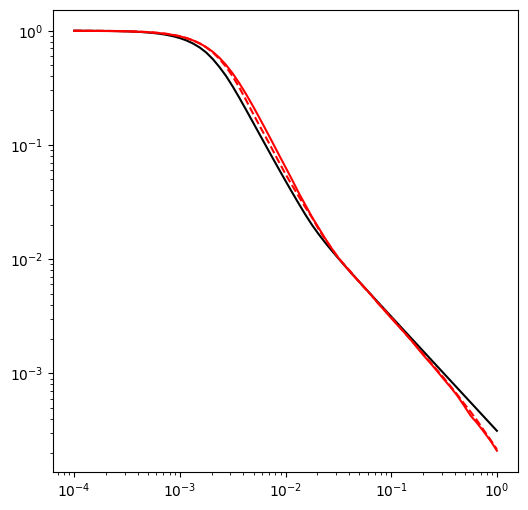

In [5]:
plt.close('all')
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.plot(q,S_q,'-k')
ax.plot(q,S_q_MC,'--r')
ax.plot(q,S_q_MC_woSA,'-r')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()